In [1]:
#needed dependencies for io in Drive
!pip install -U -q PyDrive
!pip install h5py
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/CST/BabyLM-Idea/Strict-2025/"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Mounted at /content/drive
all_models_detailed_results.json	    StrictFig-MainBody.ipynb
all_models_last_checkpoint_detailed.json    StrictFigs.ipynb
all_models_last_checkpoint_simplified.json  StrictFigs-Revised.ipynb
all_models_simplified_results.json


**OPT Text Distribution by Metric**

/tmp/ipython-input-3485412668.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipython-input-3485412668.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipython-input-3485412668.py:88: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2)  # <-- Make space for legend below figure


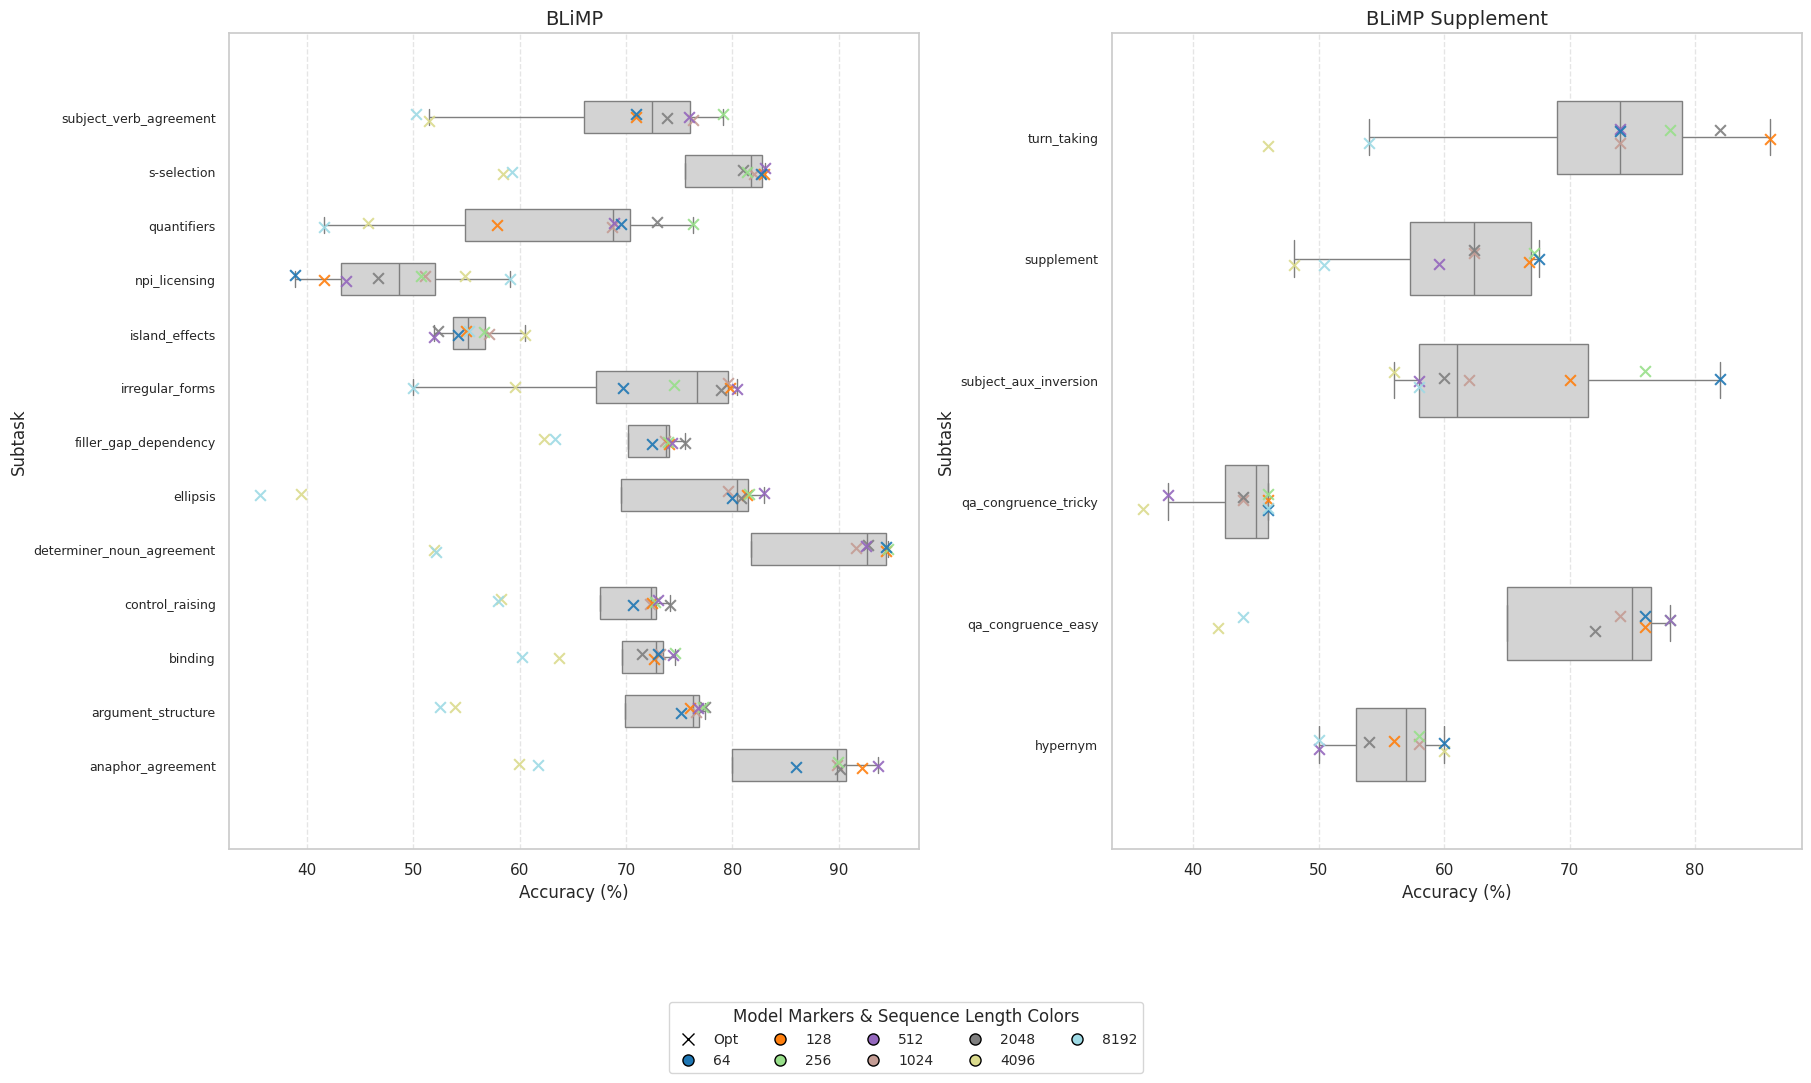

/tmp/ipython-input-3485412668.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipython-input-3485412668.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipython-input-3485412668.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipython-input-3485412668.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2)  # <-- Make space for legend below figure


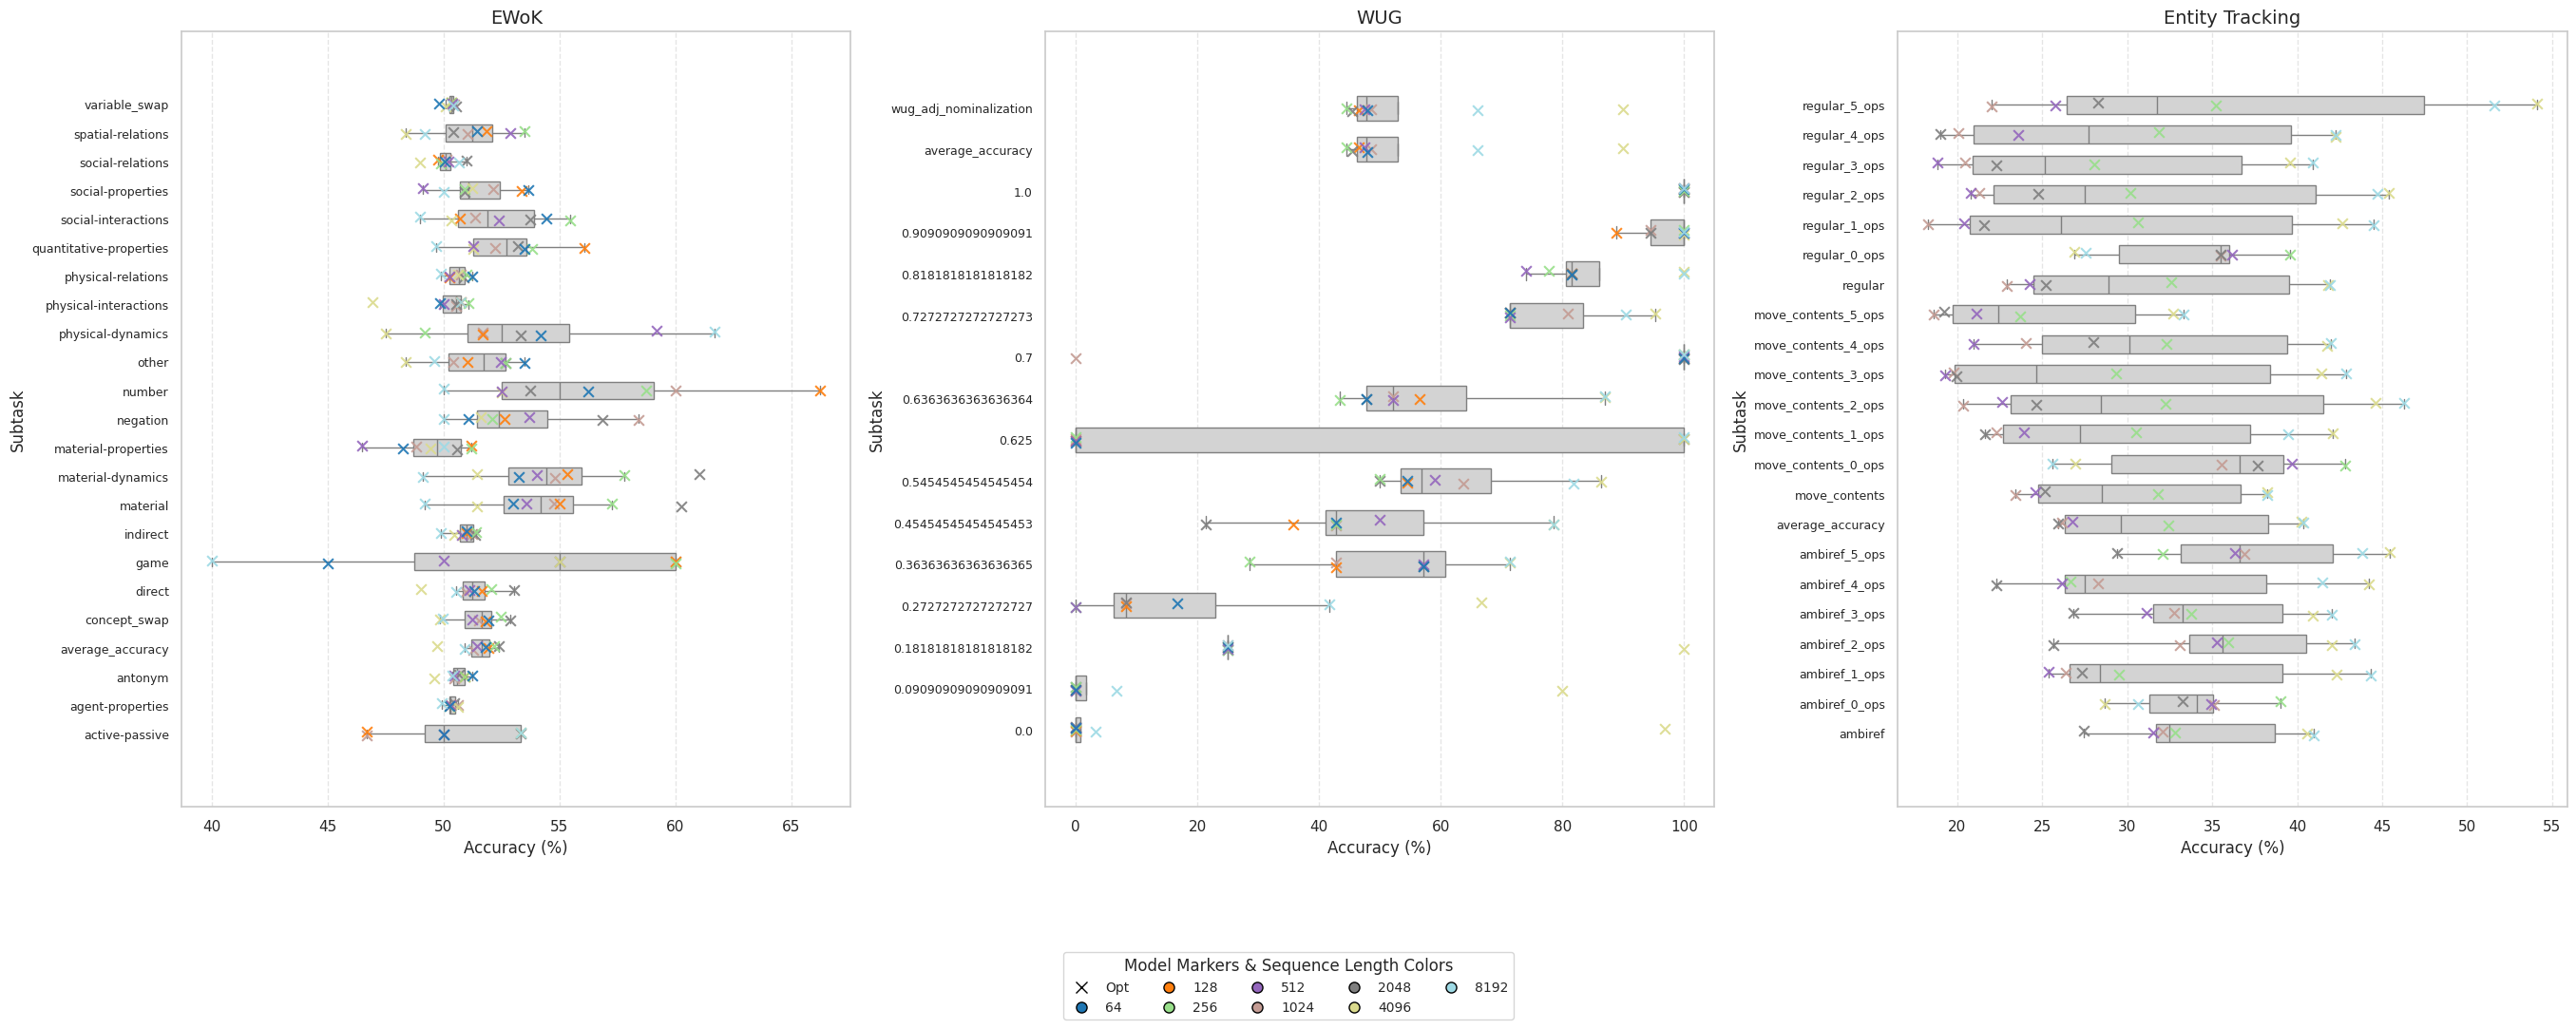

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

def plot_task_panels(df, tasks, axes, pretty_task_names, seq_len_to_color, model_to_marker):
    for ax, task_name in zip(axes, tasks):
        df_task = df[df["task"] == task_name]
        if df_task.empty:
            ax.set_visible(False)
            continue

        subtasks_order = sorted(df_task["subtask"].unique())
        # Boxplot with fixed order, orient horizontal
        sns.boxplot(
            data=df_task,
            y="subtask",
            x="score",
            order=subtasks_order,
            whis=1.5,
            width=0.6,
            fliersize=0,
            color='lightgray',
            orient='h',
            ax=ax
        )

        # Scatter points with jitter around y-position
        for _, row in df_task.iterrows():
            y_pos = subtasks_order.index(row["subtask"])
            jitter = (np.random.rand() - 0.5) * 0.15  # smaller jitter
            ax.scatter(
                row["score"],
                y_pos + jitter,
                marker=model_to_marker.get(row["model"], "o"),
                color=seq_len_to_color.get(row["seq_len"], "gray"),
                edgecolor="black",
                s=60,
                alpha=0.9,
                zorder=3
            )

        ax.set_title(pretty_task_names.get(task_name, task_name), fontsize=14)
        ax.set_xlabel("Accuracy (%)", fontsize=12)
        ax.set_ylabel("Subtask", fontsize=12)
        ax.invert_yaxis()  # to have top subtask at the top

        # Make sure yticks correspond exactly to subtasks with readable font size
        ax.set_yticks(range(len(subtasks_order)))
        ax.set_yticklabels(subtasks_order, fontsize=9)

        # Increase left margin for labels to not cut off text
        ax.margins(y=0.1)
        ax.grid(True, axis='x', linestyle='--', alpha=0.5)

def create_legend(fig, model_to_marker, seq_len_to_color, legend_title, loc='upper center', ncol=5):
    model_handles = [
        Line2D([0], [0], marker=marker, color='w', label=model,
               markerfacecolor='gray', markeredgecolor='black', markersize=8)
        for model, marker in model_to_marker.items()
    ]
    seq_len_handles = [
        Line2D([0], [0], marker='o', color='w', label=str(seq_len),
               markerfacecolor=color, markeredgecolor='black', markersize=8)
        for seq_len, color in seq_len_to_color.items()
    ]
    legend = fig.legend(
        handles=model_handles + seq_len_handles,
        title=legend_title,
        bbox_to_anchor=(0.5, -0.1),  # below figure center
        loc=loc,
        ncol=ncol,
        frameon=True,
        fontsize=10,
        title_fontsize=12
    )
    return legend

# --------
# FIGURE 1: BLiMP and BLiMP Supplement
# --------
fig, axes = plt.subplots(1, 2, figsize=(18, 9), constrained_layout=True)

figure1_tasks = ["zero_shot_causal_blimp", "zero_shot_causal_blimp_supplement_fast"]
plot_task_panels(df, figure1_tasks, axes, pretty_task_names, seq_len_to_color, model_to_marker)
create_legend(fig, model_to_marker, seq_len_to_color, "Model Markers & Sequence Length Colors")

fig.subplots_adjust(bottom=0.2)  # <-- Make space for legend below figure

plt.savefig("figure1_blimp_and_supplement.png", dpi=300)
plt.show()


# --------
# FIGURE 2: EWoK, WUG, Entity Tracking
# --------
fig, axes = plt.subplots(1, 3, figsize=(27, 9), constrained_layout=True)

figure2_tasks = ["zero_shot_causal_ewok", "zero_shot_causal_wug", "zero_shot_causal_entity_tracking"]
plot_task_panels(df, figure2_tasks, axes, pretty_task_names, seq_len_to_color, model_to_marker)
create_legend(fig, model_to_marker, seq_len_to_color, "Model Markers & Sequence Length Colors")

fig.subplots_adjust(bottom=0.2)  # <-- Make space for legend below figure

plt.savefig("figure2_ewok_wug_entity_tracking.png", dpi=300)
plt.show()


**OPT Text Metrics -- Checkpoint Plots**

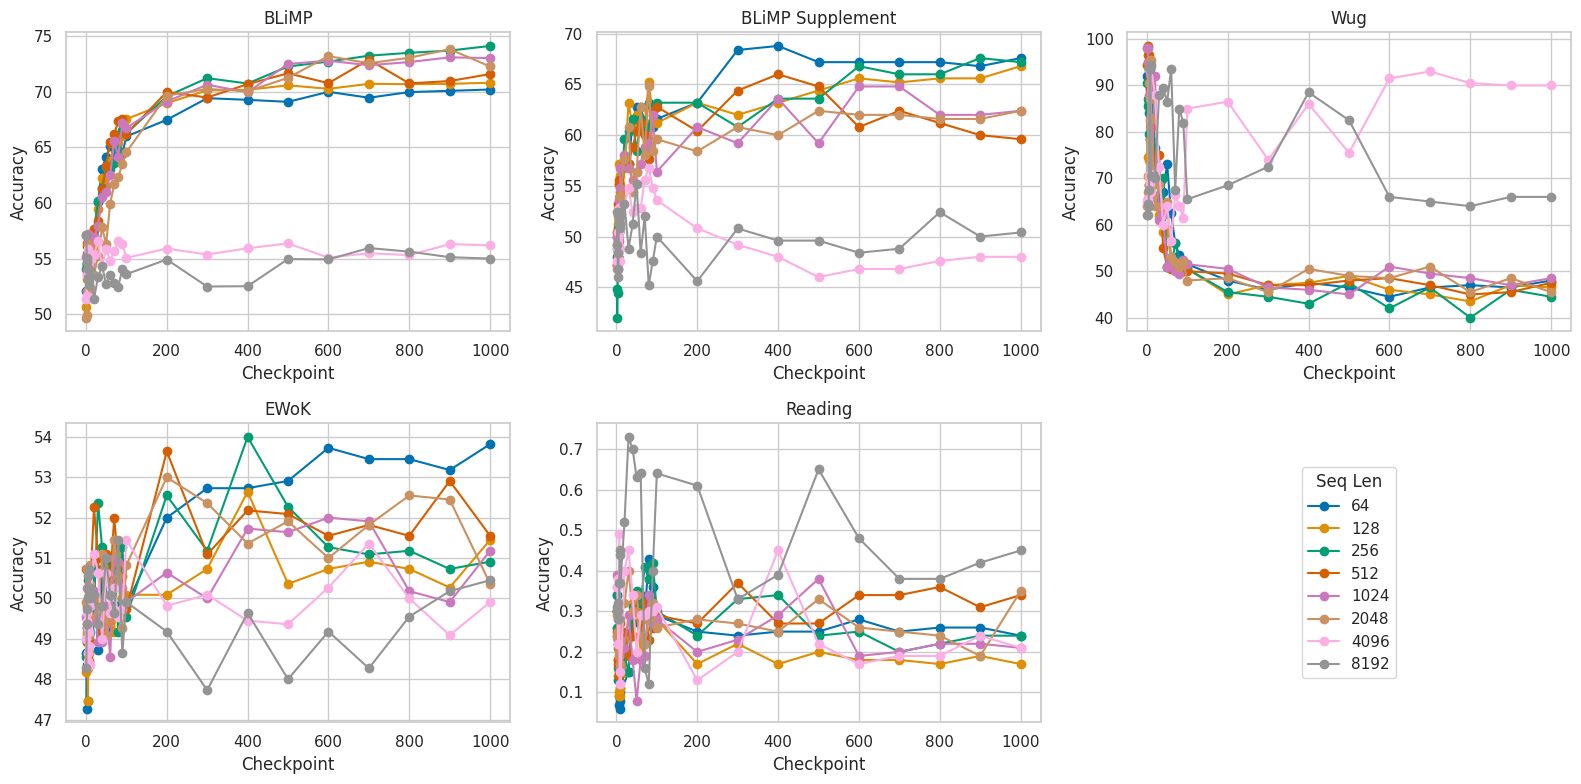

In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# Load JSON data
with open("/content/drive/MyDrive/CST/BabyLM-Idea/Strict-2025/all_models_simplified_results.json", "r") as f:
    data = json.load(f)

# Helper functions
def get_ckpt_number(ckpt_name):
    match = re.search(r"\d+", ckpt_name)
    return int(match.group()) if match else float("inf")

def parse_model_name(name):
    parts = name.split("-")
    model_type = parts[0] if parts[0] in {"mamba", "opt"} else None
    seq_len = None
    warmup = "-"
    for part in parts[1:]:
        if part.isdigit():
            seq_len = int(part)
        elif "warmup" in part:
            warmup = "+"
    return model_type, warmup, seq_len

# Task order and label mapping
metric_mapping = {
    "zero_shot_causal_blimp_blimp_fast": "BLiMP",
    "zero_shot_causal_blimp_supplement_fast": "BLiMP Supplement",
    "zero_shot_causal_wug_wug_adj_nominalization": "Wug",
    "zero_shot_causal_ewok_ewok_fast": "EWoK",
    "zero_shot_causal_reading": "Reading",
}

task_keys = list(metric_mapping.keys())
task_labels = list(metric_mapping.values())

# Prepare seaborn
sns.set(style="whitegrid", palette="colorblind")

# First, find all sequence lengths for OPT models with warmup="+"
seq_lens_found = set()
for model_name in data.keys():
    parsed_type, warmup, seq_len = parse_model_name(model_name)
    if parsed_type == "opt" and warmup == "+" and seq_len is not None:
        seq_lens_found.add(seq_len)

seq_lens_sorted = sorted(seq_lens_found)
colors = sns.color_palette("colorblind", n_colors=len(seq_lens_sorted))
seq_len_to_color = {seq_len: colors[i] for i, seq_len in enumerate(seq_lens_sorted)}

# Grid layout for tasks: 3 columns
n_cols = 3
n_rows = math.ceil((len(task_keys) + 1) / n_cols)  # +1 for legend slot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4), sharex=False)
axes = axes.flatten()

for idx, (metric, task_label) in enumerate(zip(task_keys, task_labels)):
    ax = axes[idx]

    # Gather data: {seq_len: [(ckpt, score), ...]}
    seq_len_to_vals = {}

    for model_name, checkpoints in data.items():
        parsed_type, warmup, seq_len = parse_model_name(model_name)
        if parsed_type != "opt" or warmup != "+":
            continue
        if seq_len is None:
            continue

        values = []
        for ckpt_name, ckpt_metrics in checkpoints.items():
            if metric in ckpt_metrics:
                values.append((get_ckpt_number(ckpt_name), ckpt_metrics[metric]))
        if values:
            values.sort()
            seq_len_to_vals.setdefault(seq_len, []).append(values)

    # Plot each sequence length
    for seq_len in sorted(seq_len_to_vals.keys()):
        all_ckpts = {}
        for run in seq_len_to_vals[seq_len]:
            for step, val in run:
                all_ckpts.setdefault(step, []).append(val)
        x_vals = sorted(all_ckpts.keys())
        y_vals = [sum(all_ckpts[step]) / len(all_ckpts[step]) for step in x_vals]

        ax.plot(x_vals, y_vals, marker='o', label=f"{seq_len}",
                color=seq_len_to_color[seq_len])

    ax.set_title(task_label)
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("Accuracy")
    ax.grid(True)

# Legend in the last (empty) subplot
legend_ax = axes[len(task_keys)]
legend_ax.axis("off")
legend_ax.legend(
    handles=[
        plt.Line2D([0], [0], color=seq_len_to_color[seq], marker='o', linestyle='-', label=str(seq))
        for seq in seq_lens_sorted
    ],
    title="Seq Len",
    loc="center"
)

# Hide any truly unused axes after legend
for j in range(len(task_keys) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("opt_models_grid_consistent_colors_with_legend.png", dpi=300)
plt.show()


Eye Tracking and Reading

/tmp/ipython-input-2983001082.py:93: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=-0.5)


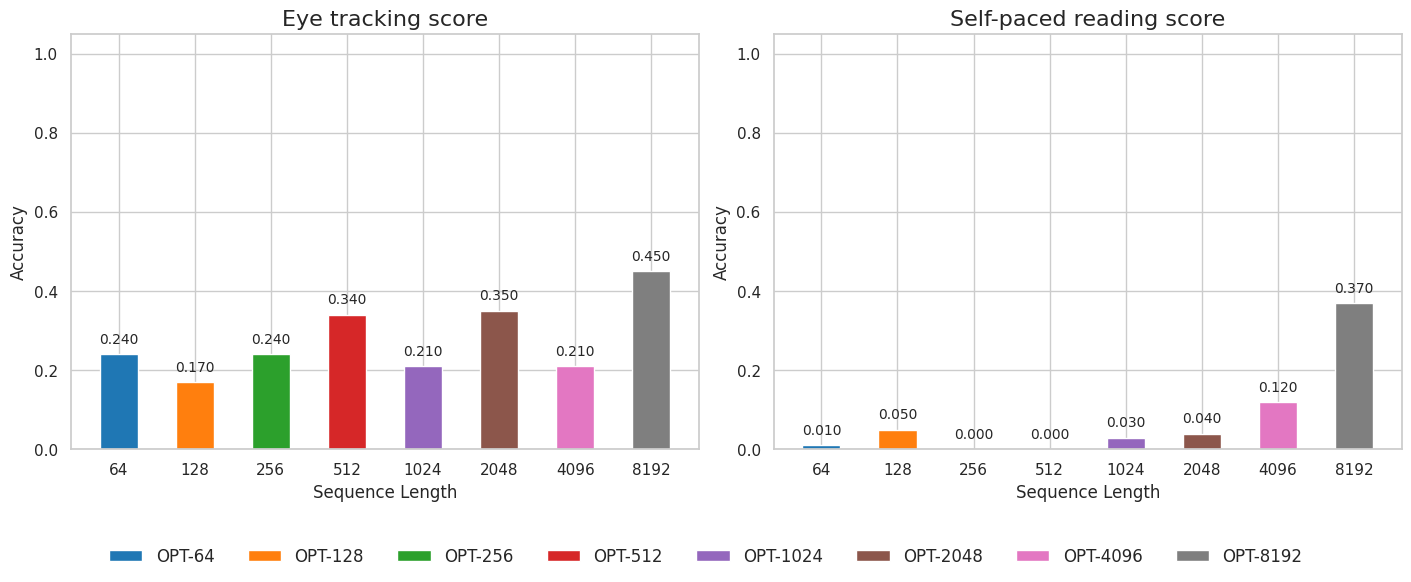

In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import re

# Helper function
def parse_model_name(name):
    parts = name.split("-")
    model_type = parts[0] if parts[0] in {"mamba", "opt"} else None
    seq_len = None
    warmup = "-"
    for part in parts[1:]:
        if part.isdigit():
            seq_len = int(part)
        elif "warmup" in part:
            warmup = "+"
    return model_type, warmup, seq_len

# Load JSON with detailed metrics
with open('/content/drive/MyDrive/CST/BabyLM-Idea/Strict-2025/all_models_last_checkpoint_detailed.json', 'r') as f:
    data = json.load(f)

# Extract subtasks from zero_shot_causal_reading for OPT only
rows_subtask_scores = []
for ckpt_name, model_data in data.items():
    model_type, warmup, seq_len = parse_model_name(ckpt_name)
    if model_type != "opt" or seq_len is None:  # Only OPT models
        continue

    zs_task = model_data.get("zero_shot_causal_reading", None)
    if zs_task is None:
        continue

    for subtask in ["eye_tracking_score", "self-paced_reading_score"]:
        score = zs_task.get(subtask, None)
        if score is not None:
            rows_subtask_scores.append({
                'model': "OPT",
                'warmup': warmup,
                'seq_len': seq_len,
                'subtask': subtask,
                'score': score
            })

# Convert to DataFrame
df_subtasks = pd.DataFrame(rows_subtask_scores)

def plot_subtask_scores(df, metric_name, output_file):
    seq_order = sorted(df['seq_len'].unique())
    base_cmap = plt.get_cmap('tab10')
    colors = [base_cmap(i % base_cmap.N) for i in range(len(seq_order))]

    subtasks = df['subtask'].unique()

    fig, axes = plt.subplots(nrows=1, ncols=len(subtasks), figsize=(14, 5), constrained_layout=True)

    if len(subtasks) == 1:
        axes = [axes]  # Ensure list-like

    for i, subtask in enumerate(subtasks):
        ax = axes[i]
        data_subtask = df[df['subtask'] == subtask]

        width = 0.5
        x = np.arange(len(seq_order))

        for j, seq_len in enumerate(seq_order):
            subset = data_subtask[data_subtask['seq_len'] == seq_len]
            opt_score = subset['score'].values[0] if len(subset) > 0 else 0
            bar = ax.bar(x[j], opt_score, width=width, color=colors[j])

            # Add text label above bar
            ax.text(
                x[j], opt_score + 0.02,  # Slightly above bar
                f"{opt_score:.3f}",
                ha='center', va='bottom', fontsize=10
            )

        ax.set_xticks(x)
        ax.set_xticklabels(seq_order)
        ax.set_ylim(0, 1.05)  # Extra space for labels
        ax.set_xlabel('Sequence Length')
        ax.set_ylabel('Accuracy')
        ax.set_title(subtask.replace("_", " ").capitalize(), fontsize=16)

    # Legend with only OPT seq lens
    legend_elements = [Patch(facecolor=colors[j], label=f'OPT-{seq_len}') for j, seq_len in enumerate(seq_order)]
    fig.legend(handles=legend_elements, loc='lower center', ncol=len(seq_order), fontsize=12, frameon=False,
               bbox_to_anchor=(0.5, -0.15), bbox_transform=fig.transFigure)

    plt.subplots_adjust(bottom=-0.5)
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

# Plot the two subtasks
plot_subtask_scores(df_subtasks, "Score", "zero_shot_causal_reading_subtasks_opt_labels.png")

